## Importing Libraries

In [146]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import folium
import nltk
from transformers import AutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
from scipy.special import softmax
from tqdm.auto import tqdm
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import metrics

print(f"pandas ==", pd.__version__)
print(f"tensorflow ==", tf.__version__)
print(f"seaborn ==", np.__version__)
print(f"numpy ==", np.__version__)
print(f"folium ==", folium.__version__)
print(f"nltk ==", nltk.__version__)


pandas == 2.1.0
tensorflow == 2.16.1
seaborn == 1.24.2
numpy == 1.24.2
folium == 0.16.0
nltk == 3.8.1


In [147]:
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

## Importing Data

In [148]:

# data_raw = pd.read_excel('/content/drive/MyDrive/home_stay_data.xlsx', 'in', dtype=str, index_col=None)
data_raw = pd.read_excel('./data/home_stay_data.xlsx', 'in', dtype=str, index_col=None)
# data_xls.to_csv('./data/home_stay_data.csv', encoding='utf-8', index=False)

## Data Preprocessing

In [149]:
features = data_raw.keys()
print(features)
print(data_raw.shape)
data_raw.tail()

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')
(74111, 29)


id         log_price property_type        room_type  \
74106  14549287  4.60517018598809     Apartment     Private room   
74107  13281809  5.04342511691924     Apartment  Entire home/apt   
74108  18688039  5.22035582507832     Apartment  Entire home/apt   
74109  17045948  5.27299955856374     Apartment  Entire home/apt   
74110   3534845  4.85203026391961          Boat  Entire home/apt   

                                               amenities accommodates  \
74106                                                 {}            1   
74107  {TV,"Cable TV",Internet,"Wireless Internet",Ki...            4   
74108  {TV,Internet,"Wireless Internet","Air conditio...            5   
74109  {TV,"Wireless Internet","Air conditioning",Kit...            2   
74110  {TV,Internet,"Wireless Internet",Kitchen,"Free...            4   

      bathrooms  bed_type cancellation_policy cleaning_fee city  \
74106         1  Real Bed            flexible        False  NYC   
74107         2  Real Bed            moderate         True   LA   
74108         1  Real Bed            moderate         True  NYC   
74109         1  Real Bed              strict         True  NYC   
74110         1  Real Bed            moderate        False   LA   

                                             description         first_review  \
74106                          one room in bushwick apt                   NaN   
74107  Located on the Pacific Coast Highway, this apa...  2016-08-15 00:00:00   
74108  A modern apartment located in East Williamsbur...  2015-01-03 00:00:00   
74109  Fully renovated, designer's studio located in ...                  NaN   
74110  You will stay-aboard the Island Trader at one ...  2013-09-05 00:00:00   

      host_has_profile_pic host_identity_verified host_response_rate  \
74106                    t                      t                NaN   
74107                    t                      f                  1   
74108                    t                      t                  1   
74109                    t                      f                  1   
74110                    t                      t                  1   

                host_since instant_bookable          last_review  \
74106  2013-03-24 00:00:00                f                  NaN   
74107  2016-05-03 00:00:00                f  2017-04-15 00:00:00   
74108  2012-01-05 00:00:00                t  2017-09-10 00:00:00   
74109  2017-09-17 00:00:00                t                  NaN   
74110  2012-11-26 00:00:00                f  2017-04-30 00:00:00   

               latitude          longitude  \
74106  40.7090253651078  -73.9394047864714   
74107  33.8715488448504  -118.396053440846   
74108  40.7067488462673  -73.9423773183644   
74109   40.738534730279  -74.0001573665565   
74110  33.7610964463293  -118.192409178807   

                                             name  neighbourhood  \
74106                           one room bushwick   Williamsburg   
74107                Spacious Hermosa 2 BR on PCH  Hermosa Beach   
74108  Modern 2 Bedroom Apartment in Williamsburg   Williamsburg   
74109        Designer's Apartment in HEART of NYC   West Village   
74110              Cozy Boat at Shoreline Village     Long Beach   

      number_of_reviews review_scores_rating  \
74106                 0                  NaN   
74107                16                   93   
74108                43                   94   
74109                 0                  NaN   
74110               205                   96   

                                           thumbnail_url zipcode bedrooms beds  
74106  https://a0.muscache.com/im/pictures/55162426/6...   11206        1    1  
74107  https://a0.muscache.com/im/pictures/2b86560b-a...   90254        2    4  
74108  https://a0.muscache.com/im/pictures/7fbe448c-5...   11206        2    2  
74109  https://a0.muscache.com/im/pictures/b3971b63-0...   10011        0    2  
74110  https://a0.muscache.com/im/pictures/22968537/d

In [150]:
#checking for null values
data_raw.isna().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   6
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                         10
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

#### Handling Null Values

* The dataset has many null values, they need to be dealt with
* Total number of examples: 74,111
* Since the number of examples is high, it is reasonable to drop examples missing critical data (bathrooms, bedrooms, beds)


In [151]:
data = data_raw.copy()
data = data.dropna(subset=['bathrooms', 'bedrooms', 'beds'])
data.loc[data.duplicated()]


Empty DataFrame
Columns: [id, log_price, property_type, room_type, amenities, accommodates, bathrooms, bed_type, cancellation_policy, cleaning_fee, city, description, first_review, host_has_profile_pic, host_identity_verified, host_response_rate, host_since, instant_bookable, last_review, latitude, longitude, name, neighbourhood, number_of_reviews, review_scores_rating, thumbnail_url, zipcode, bedrooms, beds]
Index: []

* Now to handle missing dates, the objects are to be converted to datetime type
* host_since is the earliest date, followed by first_review and last_review
* to handle host_since missing values, we can use the mean date
* to handle first review and last review we can find the mean difference between host since and the said values, add the duration to host_since and obtain values for first and last review

In [152]:
data['host_since'] = pd.to_datetime(data_raw['host_since'])
data['last_review'] = pd.to_datetime(data_raw['last_review'])
data['first_review'] = pd.to_datetime(data_raw['first_review'])


In [153]:

host_since = data['host_since']
#we are only considering a quartile of data to get rid of outliars 
q1 = host_since.quantile(0.25)
q3 = host_since.quantile(0.75)
print(q1, q3)
filtered_host_since = host_since[(host_since >= q1) & (host_since <= q3)]
mean_val = filtered_host_since.mean()
data['host_since'] = data['host_since'].fillna(mean_val)
# data.isna().sum()


2013-04-26 00:00:00 2015-12-23 00:00:00


In [154]:
temp_data  = data
temp_data = temp_data.dropna(subset=['first_review', 'last_review'])
since_first_review = temp_data['first_review'] - mean_val
since_last_review = temp_data['last_review'] - mean_val
print(since_first_review.mean(), since_last_review.mean())

data.loc[data['first_review'].isna(), 'first_review'] = data['host_since'][data['first_review'].isna()] + since_first_review.mean()
data.loc[data['last_review'].isna(), 'last_review'] = data['host_since'][data['last_review'].isna()] + since_last_review.mean()
data.isna().sum()

478 days 06:32:19.934649928 900 days 13:55:04.835312176


id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                     0
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   6
first_review                  0
host_has_profile_pic        187
host_identity_verified      187
host_response_rate        18208
host_since                    0
instant_bookable              0
last_review                   0
latitude                      0
longitude                     0
name                         10
neighbourhood              6847
number_of_reviews             0
review_scores_rating      16637
thumbnail_url              8155
zipcode                     951
bedrooms                      0
beds                          0
dtype: int64

## Feature Engineering

* Now the more relavant features need to be made out of the raw dataset
* Following features shall be engineered to represent the data better:
    * host_tenure: No. of years between host_since to current date, to measure to host experience
    * amenities_count: No. of items in amenities array to quantify property offerings
    *  days_since_last_review: days between last_review and current date to assess listing activity and relevance.


In [ ]:
current_date = datetime.today()

data['host_tenure'] = (current_date - data['host_since']).dt.days / 365
data['host_tenure'] = data['host_tenure'].round(2)

data['amenities_count'] = data['amenities'].apply(lambda x: len(x.strip('{}').split(",")))

data['days_since_last_review'] = current_date - data['last_review']
data['days_since_last_review'] = data['days_since_last_review'].dt.days
data.dtypes


id                                object
log_price                         object
property_type                     object
room_type                         object
amenities                         object
accommodates                      object
bathrooms                         object
bed_type                          object
cancellation_policy               object
cleaning_fee                      object
city                              object
description                       object
first_review              datetime64[ns]
host_has_profile_pic              object
host_identity_verified            object
host_response_rate                object
host_since                datetime64[ns]
instant_bookable                  object
last_review               datetime64[ns]
latitude                          object
longitude                         object
name                              object
neighbourhood                     object
number_of_reviews                 object
review_scores_ra

## Exploratory Data Analysis 

#### Corellation between numerical data

In [156]:

data['log_price'] = pd.to_numeric(data['log_price'])
data['accommodates'] = pd.to_numeric(data['accommodates'])
data['number_of_reviews'] = pd.to_numeric(data['number_of_reviews'])
data['bathrooms'] = pd.to_numeric(data['bathrooms'])
data['bedrooms'] = pd.to_numeric(data['bedrooms'])
data['beds'] = pd.to_numeric(data['beds'])



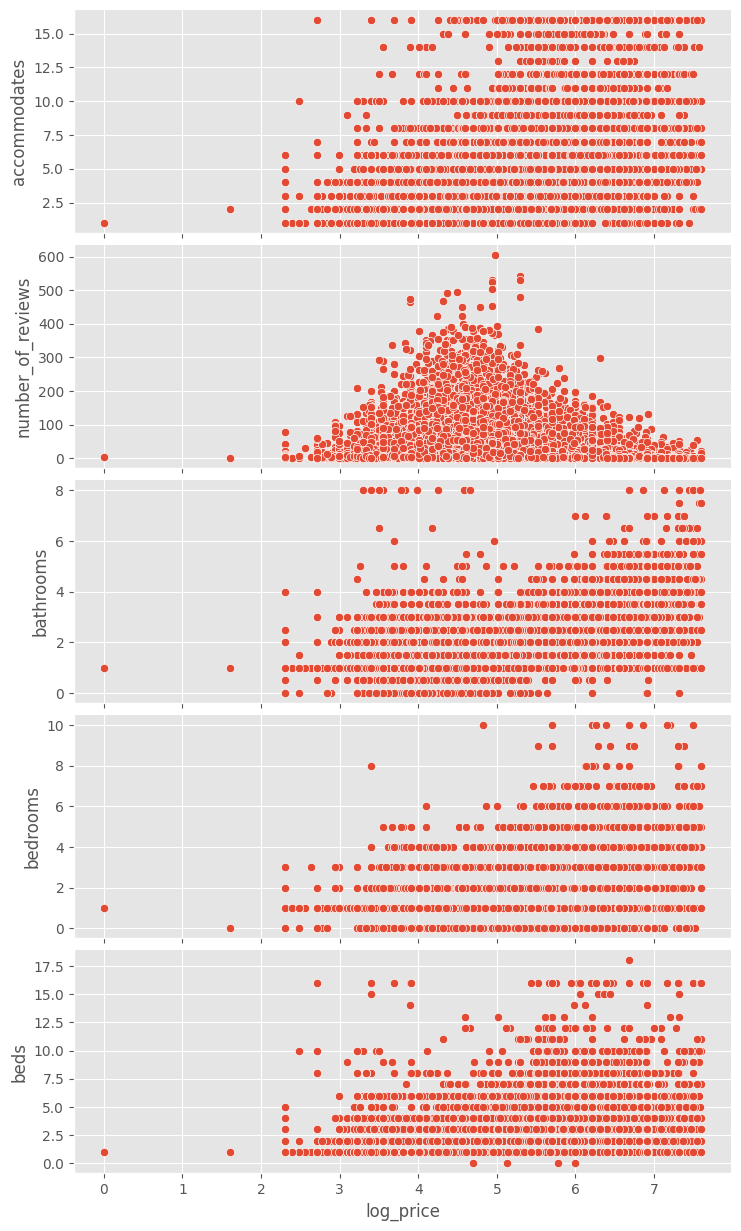

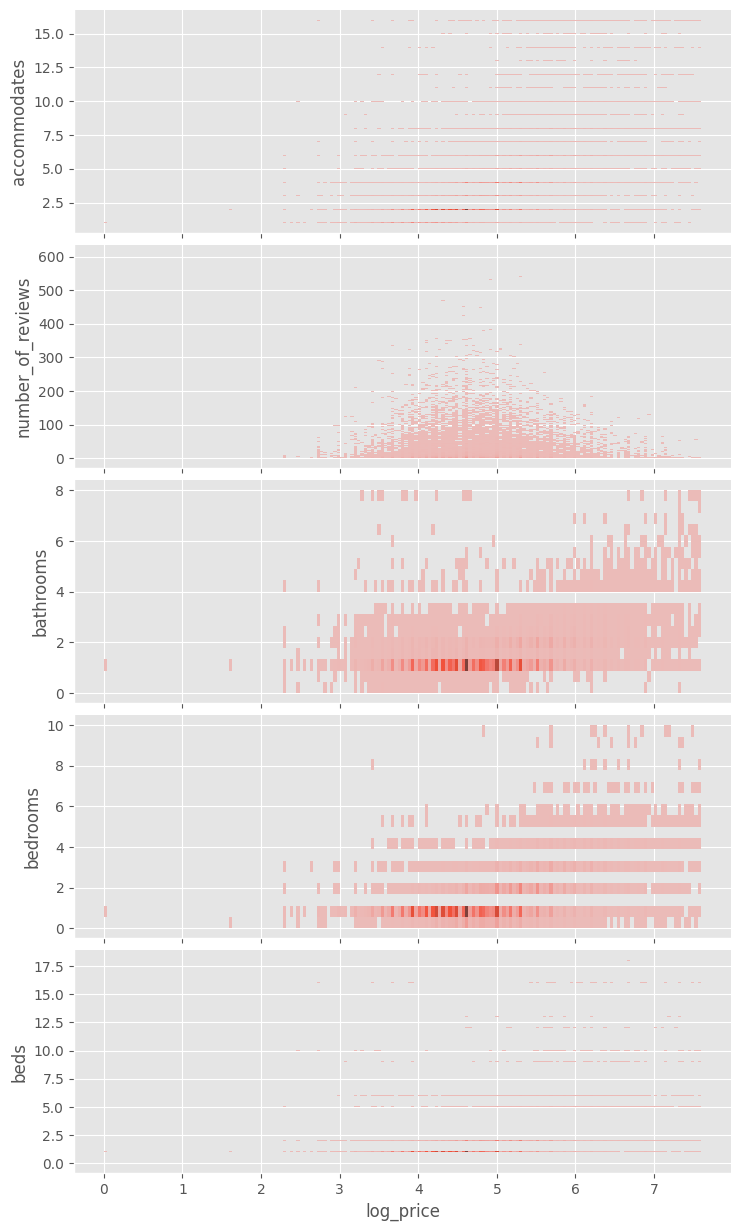

In [157]:
# plt.figure(figsize=(50, 6)) 
sns.pairplot(data, y_vars=['accommodates','number_of_reviews', 'bathrooms','bedrooms', 'beds'], x_vars=['log_price'], aspect=3, kind='scatter')
sns.pairplot(data, y_vars=['accommodates','number_of_reviews', 'bathrooms','bedrooms', 'beds'], x_vars=['log_price'], aspect=3, kind='hist')
# sns.pairplot(data, y_vars=['accommodates','number_of_reviews', 'bathrooms','bedrooms', 'beds'], x_vars=['log_price'], aspect=3, kind='kde')

plt.show()

##### Inference
We can infer the following from the distribution that we see in histograms
* The distribution for accomodants, bathrooms, bedrooms and beds has a positive slop
* This suggests that as the values of these parameters increase, the value of log price also increases
* No such correlation is evident with number of reviews

<Axes: >

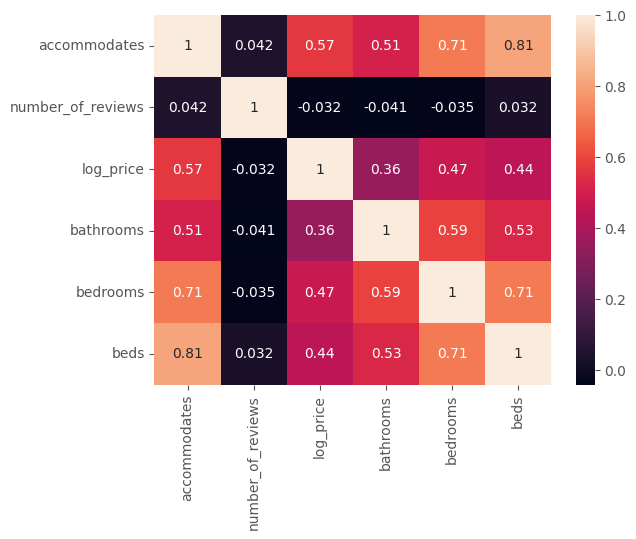

In [158]:
data_corr  = data[['accommodates','number_of_reviews','log_price', 'bathrooms','bedrooms', 'beds']].corr()
sns.heatmap(data_corr, annot=True)

##### Inference
From the correlation matrix, we can infer that

log price has:
* moderate correlation with: accommodates, bedrooms, beds (0.4 <= cor <= 0.7)

#### Correlation with categorical data

In [159]:
print(data['room_type'].unique())
print(data['property_type'].unique())
print(data['bed_type'].unique())
print(data['cancellation_policy'].unique())


['Entire home/apt' 'Private room' 'Shared room']
['Apartment' 'House' 'Condominium' 'Loft' 'Townhouse' 'Hostel'
 'Guest suite' 'Bed & Breakfast' 'Bungalow' 'Guesthouse' 'Dorm' 'Other'
 'Camper/RV' 'Villa' 'Boutique hotel' 'Timeshare' 'In-law' 'Boat'
 'Serviced apartment' 'Castle' 'Cabin' 'Treehouse' 'Tipi' 'Vacation home'
 'Tent' 'Hut' 'Casa particular' 'Chalet' 'Yurt' 'Earth House' 'Train'
 'Cave' 'Lighthouse' 'Island']
['Real Bed' 'Futon' 'Pull-out Sofa' 'Couch' 'Airbed']
['strict' 'moderate' 'flexible' 'super_strict_60' 'super_strict_30']


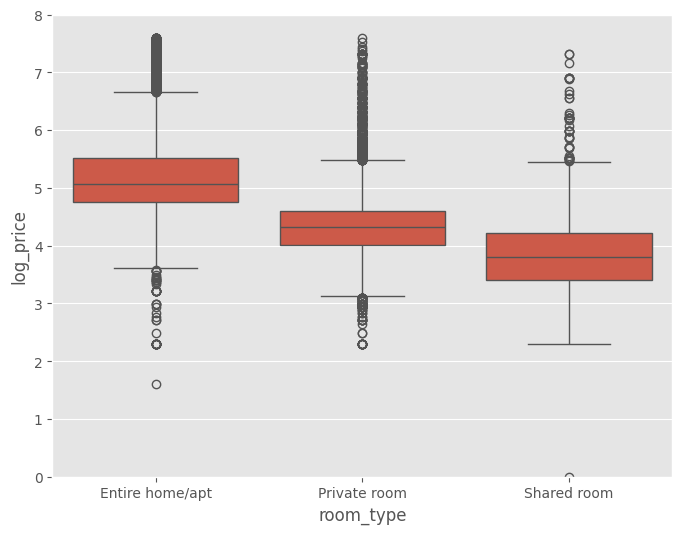

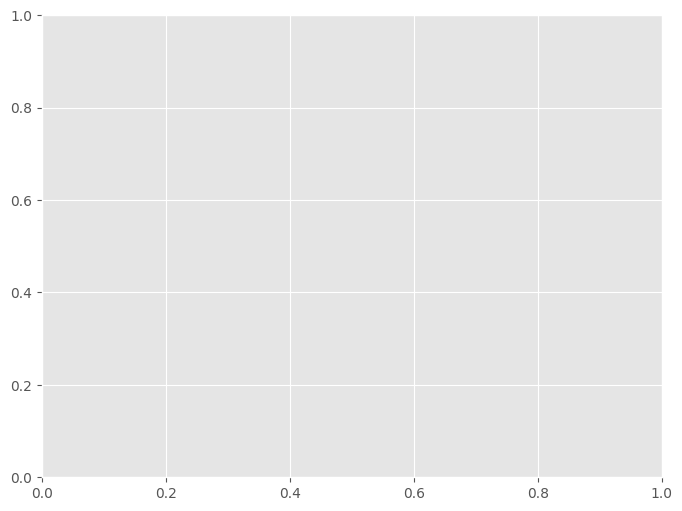

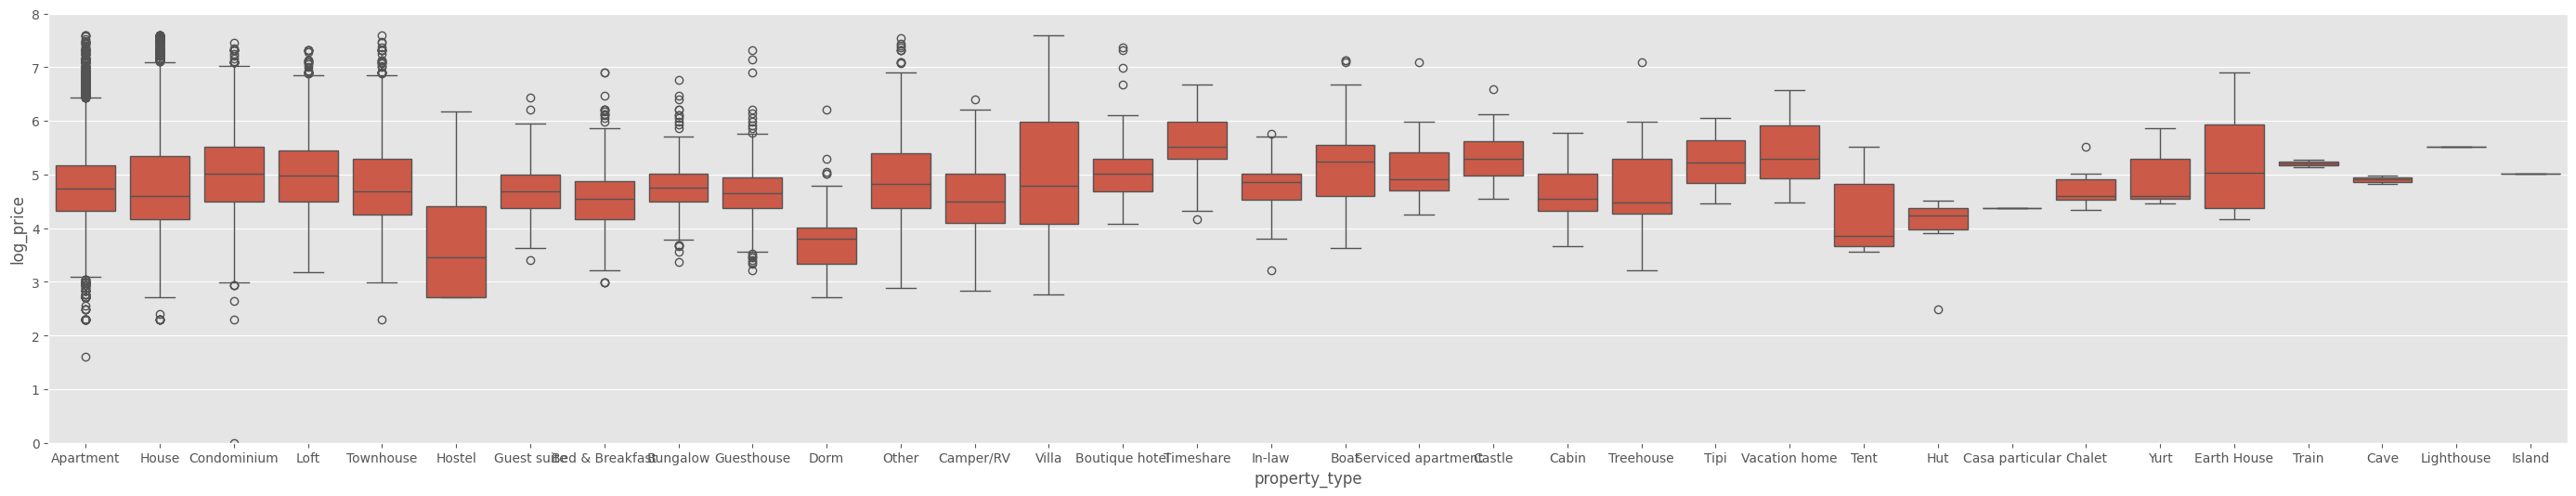

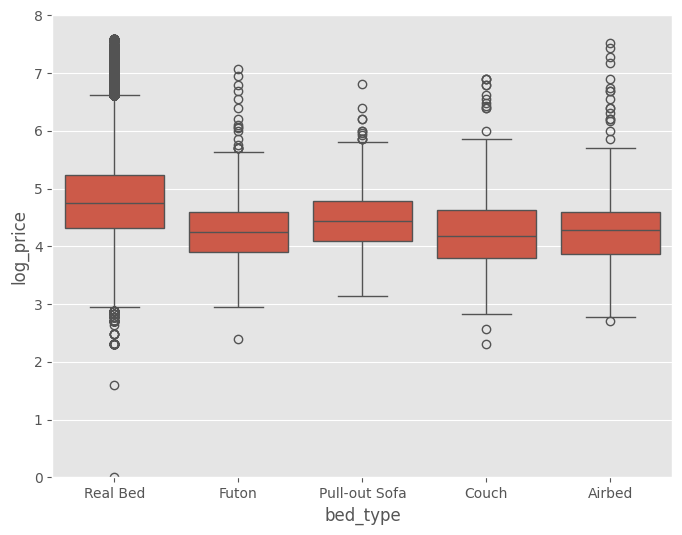

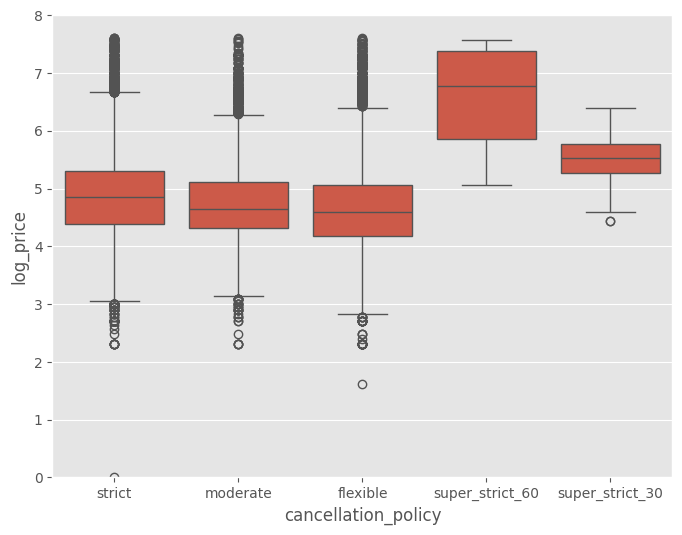

In [160]:
categorical = ['room_type', 'property_type', 'bed_type', 'cancellation_policy']
for i in categorical:
    f, ax = plt.subplots(figsize=(8, 6))
    if(i=='property_type'):
        f, ax = plt.subplots(figsize=(35, 6))
    sns.boxplot(x=i, y="log_price", data=data)
    plt.axis(ymin=0, ymax=8)
    plt.show()

I suspect that super_strict_60 and 30 are wrong data entries, in which case I might combine them with some other value

In [161]:
count1 = data['cancellation_policy'].value_counts()['super_strict_60']
count2 = data['cancellation_policy'].value_counts()['super_strict_30']
print(count1, count2)

17 107


My suspicion seems to be wrong, even though a minority, they have considerable amount of entries to be a mistake

##### Inference

From the boxplot we can infer the following:
* log price correlate with room type and property type, with 
* There is little correlation between log price and bed type since the mean remains same with all types
* the super strict cancellation policy seems to increase the log price, but that might be due to low number of examples

## Geospatial analysis

In [162]:
def get_color(price):
    cmap = ["darkgreen", "green","lightgreen", "yellow", "orange", "red"    "brown", "white"]
    if(7 < price and price <= 8):
      return cmap[0]
    elif(6 < price and price <= 7):
      return cmap[1]
    elif(5 < price and price <= 6):
      return cmap[2]
    elif(4 < price and price <= 5):
      return cmap[3]
    elif(3 < price and price <= 4):
      return cmap[4]
    elif(2 < price and price <= 3):
      return cmap[5]
    else:
      return cmap[6]  
  

In [163]:

latitude = 40.7128
longitude = -74.0060

m = folium.Map(location=[latitude, longitude], zoom_start=5) 

#coordinates of city centers: New York, Boston, Washington,Chicago, Los Angeles, San Francisco
coord = [[40.7128, -74.0060], [42.3601, -71.0589], [38.9072, -77.0369], [41.8781, -87.6298], [34.0549, -118.2426], [37.7749, -122.4194]]

#plotting city centers
for c in coord:
    folium.CircleMarker(
            location=[c[0], c[1]],
            radius=10,
            color="purple",
            fill=True,
            fill_color="purple",
            fill_opacity = 1
        ).add_to(m)

for index, row in data.iterrows():
    #only plotting a fraction to keep the map from lagging
    if(index%20 == 0):
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=5,
            color=get_color(row['log_price']),
            fill=True,
            fill_color=get_color(row['log_price']),
            fill_opacity = 0.8
        ).add_to(m)

m

### Inference

From the geospatial data we can infer that:
* New York: Manhattan area has properties with higher log_price
* Boston: Prices are high boston but decrease as location nears brooklyn
* Washington : Prices high near center city center (Dupont circle, penn quarter area)

Similar trends can be seen in Chicago, Los Angeles and San Francisco too

As the distance from city center increases the log price decreases

**Special Note:** In case of Los Angeles, the price is low around city center but it increases near beach and hollywood. Hence we shall consider not only distance from city center but also the name of city (so that model can capture city specific details rather than just the general distance), to capture nuances like this. 

#### Feature to encode location

* A feature can be constructed that encodes this information
* We can take **haversine_distance** and city centers
* The reason for taking absolute difference rather than haversine distance is because it's less computationally intensive and captures the require relationship

In [164]:
# coordinates of city centers: New York, Boston, Washington,Chicago, Los Angeles, San Francisco
centers = pd.DataFrame(
    {
        "latitude": [40.7128, 42.3601, 38.9072, 41.8781, 34.0549, 37.7749],
        "longitude": [-74.0060, -71.0589, -77.0369, -87.6298, -118.2426, -122.4194],
    }
)

data['latitude'] = pd.to_numeric(data['latitude'])
data['longitude'] = pd.to_numeric(data['longitude'])
def calculate_distance_from_cities(data):
    lat_diff = abs(data["latitude"].values[:, None] - centers["latitude"].values)
    lon_diff = abs(data["longitude"].values[:, None] - centers["longitude"].values)

    total_diff = lat_diff + lon_diff

    return total_diff.min(axis=1)

data['distance_from_city'] = calculate_distance_from_cities(data)
data.tail()

id  log_price property_type        room_type  \
74106  14549287   4.605170     Apartment     Private room   
74107  13281809   5.043425     Apartment  Entire home/apt   
74108  18688039   5.220356     Apartment  Entire home/apt   
74109  17045948   5.273000     Apartment  Entire home/apt   
74110   3534845   4.852030          Boat  Entire home/apt   

                                               amenities  accommodates  \
74106                                                 {}             1   
74107  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4   
74108  {TV,Internet,"Wireless Internet","Air conditio...             5   
74109  {TV,"Wireless Internet","Air conditioning",Kit...             2   
74110  {TV,Internet,"Wireless Internet",Kitchen,"Free...             4   

       bathrooms  bed_type cancellation_policy cleaning_fee city  \
74106        1.0  Real Bed            flexible        False  NYC   
74107        2.0  Real Bed            moderate         True   LA   
74108        1.0  Real Bed            moderate         True  NYC   
74109        1.0  Real Bed              strict         True  NYC   
74110        1.0  Real Bed            moderate        False   LA   

                                             description  \
74106                          one room in bushwick apt    
74107  Located on the Pacific Coast Highway, this apa...   
74108  A modern apartment located in East Williamsbur...   
74109  Fully renovated, designer's studio located in ...   
74110  You will stay-aboard the Island Trader at one ...   

                       first_review host_has_profile_pic  \
74106 2014-07-15 06:32:19.934649928                    t   
74107 2016-08-15 00:00:00.000000000                    t   
74108 2015-01-03 00:00:00.000000000                    t   
74109 2019-01-08 06:32:19.934649928                    t   
74110 2013-09-05 00:00:00.000000000                    t   

      host_identity_verified host_response_rate host_since instant_bookable  \
74106                      t                NaN 2013-03-24                f   
74107                      f                  1 2016-05-03                f   
74108                      t                  1 2012-01-05                t   
74109                      f                  1 2017-09-17                t   
74110                      t                  1 2012-11-26                f   

                        last_review   latitude   longitude  \
74106 2015-09-10 13:55:04.835312176  40.709025  -73.939405   
74107 2017-04-15 00:00:00.000000000  33.871549 -118.396053   
74108 2017-09-10 00:00:00.000000000  40.706749  -73.942377   
74109 2020-03-05 13:55:04.835312176  40.738535  -74.000157   
74110 2017-04-30 00:00:00.000000000  33.761096 -118.192409   

                                             name  neighbourhood  \
74106                           one room bushwick   Williamsburg   
74107                Spacious Hermosa 2 BR on PCH  Hermosa Beach   
74108  Modern 2 Bedroom Apartment in Williamsburg   Williamsburg   
74109        Designer's Apartment in HEART of NYC   West Village   
74110              Cozy Boat at Shoreline Village     Long Beach   

       number_of_reviews review_scores_rating  \
74106                  0                  NaN   
74107                 16                   93   
74108                 43                   94   
74109                  0                  NaN   
74110                205                   96   

                                           thumbnail_url zipcode  bedrooms  \
74106  https://a0.muscache.com/im/pictures/55162426/6...   11206         1   
74107  https://a0.muscache.com/im/pictures/2b86560b-a...   90254         2   
74108  https://a0.muscache.com/im/pictures/7fbe448c-5...   11206         2   
74109  https://a0.muscache.com/im/pictures/b3971b63-0...   10011         0   
74110  https://a0.muscache.com/im/pictures/22968537/d...   90802         1   

       beds  host_tenure  amenities_count  days_s

#### Visualising and evaluating the distance from city feature

In [165]:
def get_color2(distance):
    cmap = ["darkgreen", "green","lightgreen", "yellow", "orange", "red"    "brown", "white"]
    if( distance <= 0.03):
      return cmap[0]
    elif(0.03 < distance and distance <= 0.06):
      return cmap[1]
    elif(0.09 < distance and distance <= 0.12):
      return cmap[2]
    elif(0.12 < distance and distance <= 0.2):
      return cmap[3]
    elif(0.2 < distance and distance <= 0.5):
      return cmap[4]
    elif(0.5 < distance and distance <= 0.8):
      return cmap[5]
    else:
      return cmap[6]  
  

In [166]:

latitude = 40.7128
longitude = -74.0060

m = folium.Map(location=[latitude, longitude], zoom_start=10) 

#coordinates of city centers: New York, Boston, Washington,Chicago, Los Angeles, San Francisco
coord = [[40.7128, -74.0060], [42.3601, -71.0589], [38.9072, -77.0369], [41.8781, -87.6298], [34.0549, -118.2426], [37.7749, -122.4194]]

#plotting city centers
for c in coord:
    folium.CircleMarker(
            location=[c[0], c[1]],
            radius=10,
            color="purple",
            fill=True,
            fill_color="purple",
            fill_opacity = 1
        ).add_to(m)

for index, row in data.iterrows():
    #only plotting a fraction to keep the map from lagging
    if(index%20 == 0):
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=5,
            color=get_color2(row['distance_from_city']),
            fill=True,
            fill_color=get_color2(row['distance_from_city']),
            fill_opacity = 0.8
        ).add_to(m)

m

<Axes: >

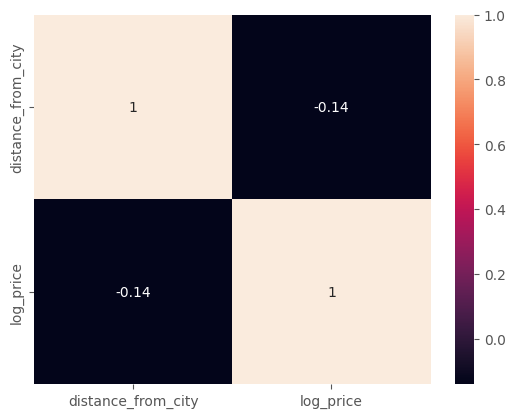

In [167]:
data_corr  = data[['distance_from_city', 'log_price']].corr()
sns.heatmap(data_corr, annot=True)

* Correlation matrix suggests low linear correlation between the two features
* let us see if using haversine distance works better

In [168]:
centers = pd.DataFrame({
    "latitude": [40.7128, 42.3601, 38.9072, 41.8781, 34.0549, 37.7749],
    "longitude": [-74.0060, -71.0589, -77.0369, -87.6298, -118.2426, -122.4194]
})

def haversine_distance(lat1, lon1, lat2, lon2):
    r = 6371  # Earth radius in kilometers
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)
    a = np.sin(delta_phi / 2) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return r * c

def calculate_distance_from_cities(data):
    # Convert data to NumPy arrays
    data_lats = data['latitude'].values
    data_lons = data['longitude'].values

    # Compute the haversine distance between each data point and each city center
    distances = np.zeros((data_lats.shape[0], centers.shape[0]))
    for i, (lat, lon) in enumerate(zip(centers['latitude'], centers['longitude'])):
        distances[:, i] = haversine_distance(data_lats, data_lons, lat, lon)

    # Return the minimum distance for each row
    return distances.min(axis=1)


data['distance_from_city_haversine'] = calculate_distance_from_cities(data)
data.tail()

id  log_price property_type        room_type  \
74106  14549287   4.605170     Apartment     Private room   
74107  13281809   5.043425     Apartment  Entire home/apt   
74108  18688039   5.220356     Apartment  Entire home/apt   
74109  17045948   5.273000     Apartment  Entire home/apt   
74110   3534845   4.852030          Boat  Entire home/apt   

                                               amenities  accommodates  \
74106                                                 {}             1   
74107  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4   
74108  {TV,Internet,"Wireless Internet","Air conditio...             5   
74109  {TV,"Wireless Internet","Air conditioning",Kit...             2   
74110  {TV,Internet,"Wireless Internet",Kitchen,"Free...             4   

       bathrooms  bed_type cancellation_policy cleaning_fee city  \
74106        1.0  Real Bed            flexible        False  NYC   
74107        2.0  Real Bed            moderate         True   LA   
74108        1.0  Real Bed            moderate         True  NYC   
74109        1.0  Real Bed              strict         True  NYC   
74110        1.0  Real Bed            moderate        False   LA   

                                             description  \
74106                          one room in bushwick apt    
74107  Located on the Pacific Coast Highway, this apa...   
74108  A modern apartment located in East Williamsbur...   
74109  Fully renovated, designer's studio located in ...   
74110  You will stay-aboard the Island Trader at one ...   

                       first_review host_has_profile_pic  \
74106 2014-07-15 06:32:19.934649928                    t   
74107 2016-08-15 00:00:00.000000000                    t   
74108 2015-01-03 00:00:00.000000000                    t   
74109 2019-01-08 06:32:19.934649928                    t   
74110 2013-09-05 00:00:00.000000000                    t   

      host_identity_verified host_response_rate host_since instant_bookable  \
74106                      t                NaN 2013-03-24                f   
74107                      f                  1 2016-05-03                f   
74108                      t                  1 2012-01-05                t   
74109                      f                  1 2017-09-17                t   
74110                      t                  1 2012-11-26                f   

                        last_review   latitude   longitude  \
74106 2015-09-10 13:55:04.835312176  40.709025  -73.939405   
74107 2017-04-15 00:00:00.000000000  33.871549 -118.396053   
74108 2017-09-10 00:00:00.000000000  40.706749  -73.942377   
74109 2020-03-05 13:55:04.835312176  40.738535  -74.000157   
74110 2017-04-30 00:00:00.000000000  33.761096 -118.192409   

                                             name  neighbourhood  \
74106                           one room bushwick   Williamsburg   
74107                Spacious Hermosa 2 BR on PCH  Hermosa Beach   
74108  Modern 2 Bedroom Apartment in Williamsburg   Williamsburg   
74109        Designer's Apartment in HEART of NYC   West Village   
74110              Cozy Boat at Shoreline Village     Long Beach   

       number_of_reviews review_scores_rating  \
74106                  0                  NaN   
74107                 16                   93   
74108                 43                   94   
74109                  0                  NaN   
74110                205                   96   

                                           thumbnail_url zipcode  bedrooms  \
74106  https://a0.muscache.com/im/pictures/55162426/6...   11206         1   
74107  https://a0.muscache.com/im/pictures/2b86560b-a...   90254         2   
74108  https://a0.muscache.com/im/pictures/7fbe448c-5...   11206         2   
74109  https://a0.muscache.com/im/pictures/b3971b63-0...   10011         0   
74110  https://a0.muscache.com/im/pictures/22968537/d...   90802         1   

       beds  host_tenure  amenities_count  days_s

<Axes: >

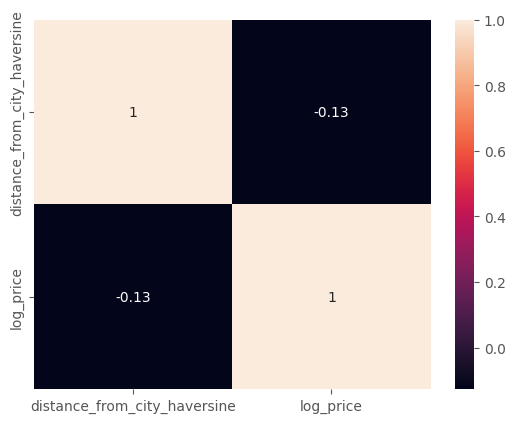

In [169]:
data_corr  = data[['distance_from_city_haversine', 'log_price']].corr()
sns.heatmap(data_corr, annot=True)

* haversine seems to make no difference so we are not going to keep this feature in our dataset

In [170]:
data = data.drop('distance_from_city_haversine', axis=1)
data.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds',
       'host_tenure', 'amenities_count', 'days_since_last_review',
       'distance_from_city'],
      dtype='object')

## Sentiment Analysis

First we need to handle data points with missing description

In [171]:
data.isna().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                     0
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   6
first_review                  0
host_has_profile_pic        187
host_identity_verified      187
host_response_rate        18208
host_since                    0
instant_bookable              0
last_review                   0
latitude                      0
longitude                     0
name                         10
neighbourhood              6847
number_of_reviews             0
review_scores_rating      16637
thumbnail_url              8155
zipcode                     951
bedrooms                      0
beds                          0
host_tenure                   0
amenities_count               0
days_sin

since only 6 data points have missing description, we can remove them 

In [172]:
data = data.dropna(subset=['description'])
print(data.shape)
data.tail()

(73760, 33)


id  log_price property_type        room_type  \
74106  14549287   4.605170     Apartment     Private room   
74107  13281809   5.043425     Apartment  Entire home/apt   
74108  18688039   5.220356     Apartment  Entire home/apt   
74109  17045948   5.273000     Apartment  Entire home/apt   
74110   3534845   4.852030          Boat  Entire home/apt   

                                               amenities  accommodates  \
74106                                                 {}             1   
74107  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4   
74108  {TV,Internet,"Wireless Internet","Air conditio...             5   
74109  {TV,"Wireless Internet","Air conditioning",Kit...             2   
74110  {TV,Internet,"Wireless Internet",Kitchen,"Free...             4   

       bathrooms  bed_type cancellation_policy cleaning_fee city  \
74106        1.0  Real Bed            flexible        False  NYC   
74107        2.0  Real Bed            moderate         True   LA   
74108        1.0  Real Bed            moderate         True  NYC   
74109        1.0  Real Bed              strict         True  NYC   
74110        1.0  Real Bed            moderate        False   LA   

                                             description  \
74106                          one room in bushwick apt    
74107  Located on the Pacific Coast Highway, this apa...   
74108  A modern apartment located in East Williamsbur...   
74109  Fully renovated, designer's studio located in ...   
74110  You will stay-aboard the Island Trader at one ...   

                       first_review host_has_profile_pic  \
74106 2014-07-15 06:32:19.934649928                    t   
74107 2016-08-15 00:00:00.000000000                    t   
74108 2015-01-03 00:00:00.000000000                    t   
74109 2019-01-08 06:32:19.934649928                    t   
74110 2013-09-05 00:00:00.000000000                    t   

      host_identity_verified host_response_rate host_since instant_bookable  \
74106                      t                NaN 2013-03-24                f   
74107                      f                  1 2016-05-03                f   
74108                      t                  1 2012-01-05                t   
74109                      f                  1 2017-09-17                t   
74110                      t                  1 2012-11-26                f   

                        last_review   latitude   longitude  \
74106 2015-09-10 13:55:04.835312176  40.709025  -73.939405   
74107 2017-04-15 00:00:00.000000000  33.871549 -118.396053   
74108 2017-09-10 00:00:00.000000000  40.706749  -73.942377   
74109 2020-03-05 13:55:04.835312176  40.738535  -74.000157   
74110 2017-04-30 00:00:00.000000000  33.761096 -118.192409   

                                             name  neighbourhood  \
74106                           one room bushwick   Williamsburg   
74107                Spacious Hermosa 2 BR on PCH  Hermosa Beach   
74108  Modern 2 Bedroom Apartment in Williamsburg   Williamsburg   
74109        Designer's Apartment in HEART of NYC   West Village   
74110              Cozy Boat at Shoreline Village     Long Beach   

       number_of_reviews review_scores_rating  \
74106                  0                  NaN   
74107                 16                   93   
74108                 43                   94   
74109                  0                  NaN   
74110                205                   96   

                                           thumbnail_url zipcode  bedrooms  \
74106  https://a0.muscache.com/im/pictures/55162426/6...   11206         1   
74107  https://a0.muscache.com/im/pictures/2b86560b-a...   90254         2   
74108  https://a0.muscache.com/im/pictures/7fbe448c-5...   11206         2   
74109  https://a0.muscache.com/im/pictures/b3971b63-0...   10011         0   
74110  https://a0.muscache.com/im/pictures/22968537/d...   90802         1   

       beds  host_tenure  amenities_count  days_s

For sentiment analysis there are two options:
1) Vader
2) Roberta (from hugging face)

* Vader uses a bag of words approach
* Vader is not able to see through the relation between words, hence I shall use Roberta
* I am using the latest available version of roberta which is trained on twitter text 

* I performed the sentiment analysis on colab and have commented out the code for my local machine
* the result has been stored in sentiment_results.csv
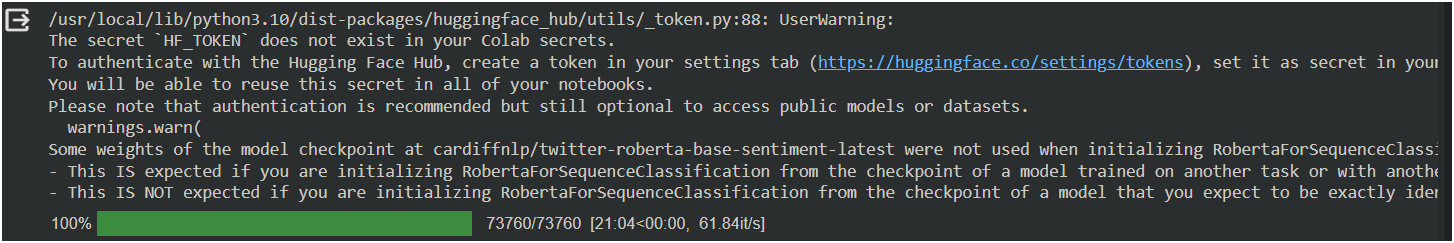

**Note:** description of index 9 seemed to be curropted, so we shall drop it

In [173]:
data = data.drop(index=9)

In [174]:
# import torch

# batch_size = 2000  # Number of iterations to process before saving results
# batch_count = 0

# sentiment_dict = {'positive':[], 'neutral':[], 'negative':[]}
# MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
# # data = data.to('cuda')
# tokenizer = AutoTokenizer.from_pretrained(MODEL)
# config = AutoConfig.from_pretrained(MODEL)
# model = AutoModelForSequenceClassification.from_pretrained(MODEL)
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = model.to(device)
# # model.save_pretrained(MODEL)
# for index, row in tqdm(data.iterrows(), total=data.shape[0]):
#     #only plotting a fraction to keep the map from lagging
#     text = row['description']
#     if(len(text)>1000):
#         text = row['description'][:1000]
#     encoded_input = tokenizer(text, return_tensors='pt', max_length=512, truncation=True)
#     encoded_input = {k: v.to(device) for k, v in encoded_input.items()}

#     output = model(**encoded_input)
#     scores = output[0][0].cpu().detach().numpy()  # Move to CPU before converting to NumPy
#     scores = softmax(scores)

#     sentiment_dict['positive'].append(np.round(scores[2], 3))
#     sentiment_dict['neutral'].append(np.round(scores[1], 3))
#     sentiment_dict['negative'].append(np.round(scores[0], 3))

#     batch_count += 1

#     if batch_count == batch_size:
#         # Save the results
#         sentiment_df = pd.DataFrame(sentiment_dict)
#         sentiment_df.to_csv(f'/content/drive/MyDrive/batch/sentiment_results_{index}.csv', index=False)

#         # Reset the batch count
#         batch_count = 0
# sentiment_df = pd.DataFrame(sentiment_dict)
# # data = pd.concat([data, sentiment_df], axis=1)
# sentiment_df.to_csv('/content/drive/MyDrive/sentiment_results.csv', index=False)

# print(sentiment_dict)

In [175]:
sentiment_result = pd.read_csv('./data/sentiment_results.csv')
sentiment_result.tail()
print(data.shape, sentiment_result.shape)
data = pd.concat([data.reset_index(drop=True), sentiment_result.reset_index(drop=True)], axis=1)

(73759, 33) (73759, 3)


In [176]:
data.head()

id  log_price property_type        room_type  \
0   6901257   5.010635     Apartment  Entire home/apt   
1   6304928   5.129899     Apartment  Entire home/apt   
2   7919400   4.976734     Apartment  Entire home/apt   
3  13418779   6.620073         House  Entire home/apt   
4   3808709   4.744932     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   
3  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.0   
4  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   

   bed_type cancellation_policy cleaning_fee city  \
0  Real Bed              strict         True  NYC   
1  Real Bed              strict         True  NYC   
2  Real Bed            moderate         True  NYC   
3  Real Bed            flexible         True   SF   
4  Real Bed            moderate         True   DC   

                                         description  \
0  Beautiful, sunlit brownstone 1-bedroom in the ...   
1  Enjoy travelling during your stay in Manhattan...   
2  The Oasis comes complete with a full backyard ...   
3  This light-filled home-away-from-home is super...   
4  Cool, cozy, and comfortable studio located in ...   

                   first_review host_has_profile_pic host_identity_verified  \
0 2016-06-18 00:00:00.000000000                    t                      t   
1 2017-08-05 00:00:00.000000000                    t                      f   
2 2017-04-30 00:00:00.000000000                    t                      t   
3 2016-08-09 06:32:19.934649928                    t                      t   
4 2015-05-12 00:00:00.000000000                    t                      t   

  host_response_rate host_since instant_bookable  \
0                NaN 2012-03-26                f   
1                  1 2017-06-19                t   
2                  1 2016-10-25                t   
3                NaN 2015-04-19                f   
4                  1 2015-03-01                t   

                    last_review   latitude   longitude  \
0 2016-07-18 00:00:00.000000000  40.696524  -73.991617   
1 2017-09-23 00:00:00.000000000  40.766115  -73.989040   
2 2017-09-14 00:00:00.000000000  40.808110  -73.943756   
3 2017-10-05 13:55:04.835312176  37.772004 -122.431619   
4 2017-01-22 00:00:00.000000000  38.925627  -77.034596   

                                       name     neighbourhood  \
0            Beautiful brownstone 1-bedroom  Brooklyn Heights   
1  Superb 3BR Apt Located Near Times Square    Hell's Kitchen   
2                          The Garden Oasis            Harlem   
3        Beautiful Flat in the Heart of SF!      Lower Haight   
4                Great studio in midtown DC  Columbia Heights   

   number_of_reviews review_scores_rating  \
0                  2                  100   
1                  6                   93   
2                 10                   92   
3                  0                  NaN   
4                  4                   40   

                                       thumbnail_url zipcode  bedrooms  beds  \
0  https://a0.muscache.com/im/pictures/6d7cbbf7-c...   11201         1     1   
1  https://a0.muscache.com/im/pictures/348a55fe-4...   10019         3     3   
2  https://a0.muscache.com/im/pictures/6fae5362-9...   10027         1     3   
3  https://a0.muscache.com/im/pictures/72208dad-9...   94117         2     2   
4                                                NaN   20009         0     1   

   host_tenure  amenities_count  days_since_last_review  distance_from_city  \
0        12.13                9                    2851            0.030660   
1         6.89               15                    2419            0.070275   
2     

In [177]:
data.tail()

id  log_price property_type        room_type  \
73754  14549287   4.605170     Apartment     Private room   
73755  13281809   5.043425     Apartment  Entire home/apt   
73756  18688039   5.220356     Apartment  Entire home/apt   
73757  17045948   5.273000     Apartment  Entire home/apt   
73758   3534845   4.852030          Boat  Entire home/apt   

                                               amenities  accommodates  \
73754                                                 {}             1   
73755  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4   
73756  {TV,Internet,"Wireless Internet","Air conditio...             5   
73757  {TV,"Wireless Internet","Air conditioning",Kit...             2   
73758  {TV,Internet,"Wireless Internet",Kitchen,"Free...             4   

       bathrooms  bed_type cancellation_policy cleaning_fee city  \
73754        1.0  Real Bed            flexible        False  NYC   
73755        2.0  Real Bed            moderate         True   LA   
73756        1.0  Real Bed            moderate         True  NYC   
73757        1.0  Real Bed              strict         True  NYC   
73758        1.0  Real Bed            moderate        False   LA   

                                             description  \
73754                          one room in bushwick apt    
73755  Located on the Pacific Coast Highway, this apa...   
73756  A modern apartment located in East Williamsbur...   
73757  Fully renovated, designer's studio located in ...   
73758  You will stay-aboard the Island Trader at one ...   

                       first_review host_has_profile_pic  \
73754 2014-07-15 06:32:19.934649928                    t   
73755 2016-08-15 00:00:00.000000000                    t   
73756 2015-01-03 00:00:00.000000000                    t   
73757 2019-01-08 06:32:19.934649928                    t   
73758 2013-09-05 00:00:00.000000000                    t   

      host_identity_verified host_response_rate host_since instant_bookable  \
73754                      t                NaN 2013-03-24                f   
73755                      f                  1 2016-05-03                f   
73756                      t                  1 2012-01-05                t   
73757                      f                  1 2017-09-17                t   
73758                      t                  1 2012-11-26                f   

                        last_review   latitude   longitude  \
73754 2015-09-10 13:55:04.835312176  40.709025  -73.939405   
73755 2017-04-15 00:00:00.000000000  33.871549 -118.396053   
73756 2017-09-10 00:00:00.000000000  40.706749  -73.942377   
73757 2020-03-05 13:55:04.835312176  40.738535  -74.000157   
73758 2017-04-30 00:00:00.000000000  33.761096 -118.192409   

                                             name  neighbourhood  \
73754                           one room bushwick   Williamsburg   
73755                Spacious Hermosa 2 BR on PCH  Hermosa Beach   
73756  Modern 2 Bedroom Apartment in Williamsburg   Williamsburg   
73757        Designer's Apartment in HEART of NYC   West Village   
73758              Cozy Boat at Shoreline Village     Long Beach   

       number_of_reviews review_scores_rating  \
73754                  0                  NaN   
73755                 16                   93   
73756                 43                   94   
73757                  0                  NaN   
73758                205                   96   

                                           thumbnail_url zipcode  bedrooms  \
73754  https://a0.muscache.com/im/pictures/55162426/6...   11206         1   
73755  https://a0.muscache.com/im/pictures/2b86560b-a...   90254         2   
73756  https://a0.muscache.com/im/pictures/7fbe448c-5...   11206         2   
73757  https://a0.muscache.com/im/pictures/b3971b63-0...   10011         0   
73758  https://a0.muscache.com/im/pictures/22968537/d...   90802         1   

       beds  host_tenure  amenities_count  days_s

## Amenities Analysis

* We can't simply analyse this as we analysed the categorical data using boxplot previously

In [179]:
from sklearn.preprocessing import MultiLabelBinarizer

temp = data.copy()
temp = temp[['amenities', 'log_price']]

for index, row in temp.iterrows():
    my_list = []
    if row['amenities'] == '{}':
        temp.at[index, 'amenities'] = my_list
        continue
    for value in row['amenities'].strip('{}').split(","):
        my_list.append(value.strip('""'))
    temp.at[index, 'amenities'] = my_list


# Create a MultiLabelBinarizer and fit it on the list of unique amenities
mlb = MultiLabelBinarizer()
test = mlb.fit_transform(temp['amenities'])
print(mlb.classes_)
res = pd.DataFrame(test, columns=mlb.classes_)
temp = pd.concat([temp.reset_index(drop=True), res.reset_index(drop=True)], axis=1)
temp.tail()

temp.drop(columns=['log_price'], inplace=True)
data = pd.concat([data.drop(columns=["amenities"]).reset_index(drop=True),temp.reset_index(drop=True)], axis=1)
data.tail()

[' smooth pathway to front door' '24-hour check-in'
 'Accessible-height bed' 'Accessible-height toilet' 'Air conditioning'
 'Air purifier' 'BBQ grill' 'Baby bath' 'Baby monitor'
 'Babysitter recommendations' 'Bath towel' 'Bathtub'
 'Bathtub with shower chair' 'Beach essentials' 'Beachfront' 'Bed linens'
 'Body soap' 'Breakfast' 'Buzzer/wireless intercom' 'Cable TV'
 'Carbon monoxide detector' 'Cat(s)' 'Changing table'
 'Childrenâ€™s books and toys' 'Childrenâ€™s dinnerware'
 'Cleaning before checkout' 'Coffee maker' 'Cooking basics' 'Crib'
 'Disabled parking spot' 'Dishes and silverware' 'Dishwasher' 'Dog(s)'
 'Doorman' 'Doorman Entry' 'Dryer' 'EV charger' 'Elevator'
 'Elevator in building' 'Essentials' 'Ethernet connection'
 'Extra pillows and blankets' 'Family/kid friendly' 'Fire extinguisher'
 'Fireplace guards' 'Firm matress' 'Firm mattress' 'First aid kit'
 'Fixed grab bars for shower & toilet' 'Flat'
 'Flat smooth pathway to front door' 'Free parking on premises'
 'Free parking o

id  log_price property_type        room_type  accommodates  \
73754  14549287   4.605170     Apartment     Private room             1   
73755  13281809   5.043425     Apartment  Entire home/apt             4   
73756  18688039   5.220356     Apartment  Entire home/apt             5   
73757  17045948   5.273000     Apartment  Entire home/apt             2   
73758   3534845   4.852030          Boat  Entire home/apt             4   

       bathrooms  bed_type cancellation_policy cleaning_fee city  \
73754        1.0  Real Bed            flexible        False  NYC   
73755        2.0  Real Bed            moderate         True   LA   
73756        1.0  Real Bed            moderate         True  NYC   
73757        1.0  Real Bed              strict         True  NYC   
73758        1.0  Real Bed            moderate        False   LA   

                                             description  \
73754                          one room in bushwick apt    
73755  Located on the Pacific Coast Highway, this apa...   
73756  A modern apartment located in East Williamsbur...   
73757  Fully renovated, designer's studio located in ...   
73758  You will stay-aboard the Island Trader at one ...   

                       first_review host_has_profile_pic  \
73754 2014-07-15 06:32:19.934649928                    t   
73755 2016-08-15 00:00:00.000000000                    t   
73756 2015-01-03 00:00:00.000000000                    t   
73757 2019-01-08 06:32:19.934649928                    t   
73758 2013-09-05 00:00:00.000000000                    t   

      host_identity_verified host_response_rate host_since instant_bookable  \
73754                      t                NaN 2013-03-24                f   
73755                      f                  1 2016-05-03                f   
73756                      t                  1 2012-01-05                t   
73757                      f                  1 2017-09-17                t   
73758                      t                  1 2012-11-26                f   

                        last_review   latitude   longitude  \
73754 2015-09-10 13:55:04.835312176  40.709025  -73.939405   
73755 2017-04-15 00:00:00.000000000  33.871549 -118.396053   
73756 2017-09-10 00:00:00.000000000  40.706749  -73.942377   
73757 2020-03-05 13:55:04.835312176  40.738535  -74.000157   
73758 2017-04-30 00:00:00.000000000  33.761096 -118.192409   

                                             name  neighbourhood  \
73754                           one room bushwick   Williamsburg   
73755                Spacious Hermosa 2 BR on PCH  Hermosa Beach   
73756  Modern 2 Bedroom Apartment in Williamsburg   Williamsburg   
73757        Designer's Apartment in HEART of NYC   West Village   
73758              Cozy Boat at Shoreline Village     Long Beach   

       number_of_reviews review_scores_rating  \
73754                  0                  NaN   
73755                 16                   93   
73756                 43                   94   
73757                  0                  NaN   
73758                205                   96   

                                           thumbnail_url zipcode  bedrooms  \
73754  https://a0.muscache.com/im/pictures/55162426/6...   11206         1   
73755  https://a0.muscache.com/im/pictures/2b86560b-a...   90254         2   
73756  https://a0.muscache.com/im/pictures/7fbe448c-5...   11206         2   
73757  https://a0.muscache.com/im/pictures/b3971b63-0...   10011         0   
73758  https://a0.muscache.com/im/pictures/22968537/d...   90802         1   

       beds  host_tenure  amenities_count  days_since_last_review  \
73754     1        11.13                1                    3162   
73755     4         8.02               16                    2580   
73756     2        12.35               31                    2432   
73757     2         6.64               15                    1524   
73758     2        11.45               18                    2565

### Relation between price and amenities

* We can use point biserial correlation to correlate amenities (boolean values) and prices (continuous values)

Top 10 Most Correlated Features:
Family/kid friendly                           0.290471
TV                                            0.263787
Cable TV                                      0.237607
translation missing: en.hosting_amenity_49    0.233496
translation missing: en.hosting_amenity_50    0.209684
Dryer                                         0.172074
Indoor fireplace                              0.170745
Washer                                        0.165850
Lock on bedroom door                          0.134655
Doorman                                       0.119982
dtype: float64


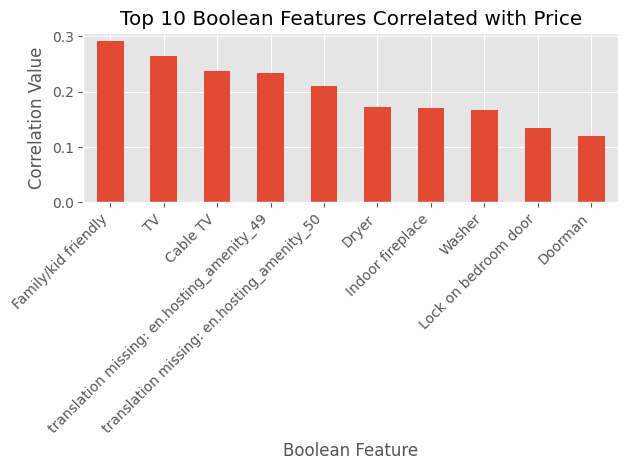

In [180]:
from scipy.stats import pointbiserialr

def find_top_correlated_boolean(data, price_col):

  boolean_cols = mlb.classes_
  correlations = {}
  
  for col in boolean_cols:
    corr, _ = pointbiserialr(data[col], data[price_col])
    corr = abs(corr)
    correlations[col] = corr


  sorted_correlations = pd.Series(correlations).sort_values(ascending=False)

  # Return top 10 features and their correlations
  return sorted_correlations.head(10)


top_features = find_top_correlated_boolean(data, 'log_price')  # You can switch to 'information_gain'
print(f"Top 10 Most Correlated Features:")
print(top_features)

# Create the bar graph
top_features.plot(kind='bar')
plt.xlabel('Boolean Feature')
plt.ylabel('Correlation Value')
plt.title('Top 10 Boolean Features Correlated with Price')
plt.xticks(rotation=45, ha='right')  # Rotate feature names for readability
plt.tight_layout()
plt.show()


## Categorical Data Encoding

* Now we shall encode the categorical data
* We shall use one hot encoding to ensure that there is no ordinal implication
    * Amenities 
    * Property_type
    * bed_type
    * cancellation_policy

* For boolen features we shall use label encoding:
    * cleaning_fee (True, False)
    * instant_bookable (t,f)


In [181]:
one_hot = pd.get_dummies(data[['room_type', 'property_type', 'bed_type', 'cancellation_policy', 'city','neighbourhood']])
data = data.drop(['room_type', 'property_type', 'bed_type', 'cancellation_policy', 'city','neighbourhood'], axis=1)
data = data.join(one_hot)


le = LabelEncoder()
data['cleaning_fee']=le.fit_transform(data['cleaning_fee'])
data['instant_bookable']=le.fit_transform(data['instant_bookable'])
data.tail()


id  log_price  accommodates  bathrooms  cleaning_fee  \
73754  14549287   4.605170             1        1.0             0   
73755  13281809   5.043425             4        2.0             1   
73756  18688039   5.220356             5        1.0             1   
73757  17045948   5.273000             2        1.0             1   
73758   3534845   4.852030             4        1.0             0   

                                             description  \
73754                          one room in bushwick apt    
73755  Located on the Pacific Coast Highway, this apa...   
73756  A modern apartment located in East Williamsbur...   
73757  Fully renovated, designer's studio located in ...   
73758  You will stay-aboard the Island Trader at one ...   

                       first_review host_has_profile_pic  \
73754 2014-07-15 06:32:19.934649928                    t   
73755 2016-08-15 00:00:00.000000000                    t   
73756 2015-01-03 00:00:00.000000000                    t   
73757 2019-01-08 06:32:19.934649928                    t   
73758 2013-09-05 00:00:00.000000000                    t   

      host_identity_verified host_response_rate host_since  instant_bookable  \
73754                      t                NaN 2013-03-24                 0   
73755                      f                  1 2016-05-03                 0   
73756                      t                  1 2012-01-05                 1   
73757                      f                  1 2017-09-17                 1   
73758                      t                  1 2012-11-26                 0   

                        last_review   latitude   longitude  \
73754 2015-09-10 13:55:04.835312176  40.709025  -73.939405   
73755 2017-04-15 00:00:00.000000000  33.871549 -118.396053   
73756 2017-09-10 00:00:00.000000000  40.706749  -73.942377   
73757 2020-03-05 13:55:04.835312176  40.738535  -74.000157   
73758 2017-04-30 00:00:00.000000000  33.761096 -118.192409   

                                             name  number_of_reviews  \
73754                           one room bushwick                  0   
73755                Spacious Hermosa 2 BR on PCH                 16   
73756  Modern 2 Bedroom Apartment in Williamsburg                 43   
73757        Designer's Apartment in HEART of NYC                  0   
73758              Cozy Boat at Shoreline Village                205   

      review_scores_rating                                      thumbnail_url  \
73754                  NaN  https://a0.muscache.com/im/pictures/55162426/6...   
73755                   93  https://a0.muscache.com/im/pictures/2b86560b-a...   
73756                   94  https://a0.muscache.com/im/pictures/7fbe448c-5...   
73757                  NaN  https://a0.muscache.com/im/pictures/b3971b63-0...   
73758                   96  https://a0.muscache.com/im/pictures/22968537/d...   

      zipcode  bedrooms  beds  host_tenure  amenities_count  \
73754   11206         1     1        11.13                1   
73755   90254         2     4         8.02               16   
73756   11206         2     2        12.35               31   
73757   10011         0     2         6.64               15   
73758   90802         1     2        11.45               18   

       days_since_last_review  distance_from_city  positive  neutral  \
73754                    3162            0.070370     0.037    0.949   
73755                    2580            0.336805     0.919    0.079   
73756                    2432            0.069674     0.889    0.109   
73757                    1524            0.031577     0.933    0.064   
73758                    2565            0.343994     0.856    0.142   

       negative                                          amenities  \
73754     0.014                                                 []   
73755     0.002  [TV, Cable TV, Internet, Wireless Internet, Ki...   
73756     0.002  [TV, Internet, Wireless Internet, Air conditio...   
73757     

## Model Development, Training, Optimization, Evaluation and Prediction

### Train-validation-test split and normalisation

* we shall now split dataset into train validation test in proportion 70, 20, 10 
* Then we shall normalise the databased on training data

In [182]:
data2 = data.copy()
#dropping some columns we are not using
data2 = data2.drop(columns=['host_has_profile_pic','host_identity_verified','host_response_rate','thumbnail_url','zipcode','first_review', 'host_since', 'last_review', 'latitude', 'longitude', 'name','id', 'description', 'amenities'])

y = data2['log_price']
X = data2.drop(columns=['log_price'])
X['review_scores_rating'] = X['review_scores_rating'].astype('float64')
X = X.fillna(X.mean(axis=0))
data_types = X.dtypes
string_cols = data_types[data_types == 'object'].index.tolist()
print(string_cols)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=42)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


X_train.dtypes


[]


accommodates                    int64
bathrooms                     float64
cleaning_fee                    int32
instant_bookable                int32
number_of_reviews               int64
                               ...   
neighbourhood_Woodlawn           bool
neighbourhood_Woodley Park       bool
neighbourhood_Woodridge          bool
neighbourhood_Woodside           bool
neighbourhood_Wrigleyville       bool
Length: 817, dtype: object

In [183]:
X_train.head()

accommodates  bathrooms  cleaning_fee  instant_bookable  \
60260             2        1.0             1                 0   
71245             4        1.0             1                 0   
66016             2        1.0             0                 1   
64111             8        2.0             1                 1   
13974             2        1.0             1                 0   

       number_of_reviews  review_scores_rating  bedrooms  beds  host_tenure  \
60260                  7            100.000000         0     1        10.44   
71245                  5             90.000000         1     2        12.93   
66016                  0             94.076621         1     1         7.59   
64111                  5             96.000000         3     3         8.45   
13974                  0             94.076621         1     1        11.98   

       amenities_count  days_since_last_review  distance_from_city  positive  \
60260               15                    2767            0.092905     0.954   
71245                7                    2954            0.137942     0.350   
66016               15                    1869            0.236547     0.361   
64111               21                    2423            0.199080     0.964   
13974               10                    3473            0.068751     0.755   

       neutral  negative   smooth pathway to front door  24-hour check-in  \
60260    0.044     0.002                              0                 1   
71245    0.596     0.053                              0                 0   
66016    0.631     0.008                              0                 0   
64111    0.033     0.002                              0                 0   
13974    0.241     0.004                              0                 0   

       Accessible-height bed  Accessible-height toilet  Air conditioning  \
60260                      0                         0                 1   
71245                      0                         0                 0   
66016                      0                         0                 1   
64111                      0                         0                 1   
13974                      0                         0                 1   

       Air purifier  BBQ grill  Baby bath  Baby monitor  \
60260             0          0          0             0   
71245             0          0          0             0   
66016             0          0          0             0   
64111             0          0          0             0   
13974             0          0          0             0   

       Babysitter recommendations  Bath towel  Bathtub  \
60260                           0           0        0   
71245                           0           0        0   
66016                           0           0        0   
64111                           0           0        0   
13974                           0           0        0   

       Bathtub with shower chair  Beach essentials  Beachfront  Bed linens  \
60260                          0                 0           0           0   
71245                          0                 0           0           0   
66016                          0                 0           0           0   
64111                          0                 0           0           0   
13974                          0                 0           0           0   

       Body soap  Breakfast  Buzzer/wireless intercom  Cable TV  \
60260          0          0                         1         1   
71245          0          0                         0         1   
66016          0          0                         0         0   
64111          0          1                         0         0   
13974          0          0                         0         1   

       Carbon monoxide detector  Cat(s)  Changing table  \
60260                         0       0               0   
71245                         0       0 

In [184]:
columns_to_scale = ['accommodates','number_of_reviews','review_scores_rating', 'host_tenure', 'amenities_count','days_since_last_review','distance_from_city']
scaler = StandardScaler()

X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_cv[columns_to_scale] = scaler.transform(X_cv[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])
X_train.tail()

print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)
print(type(X_train))
print(type(y_train))

(53106, 817) (53106,)
(13277, 817) (13277,)
(7376, 817) (7376,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


### Linear Regression
* We shall start with linear regression to get a simple start
* Depending on the performance on linear regression we shall move to more complex models if required

In [185]:
from tensorflow.keras.optimizers import RMSprop

home_stay_lr = tf.keras.Sequential(
    [
        tf.keras.Input(shape=(X_train.shape[1],)),
        layers.Dense(units=1)
    ]
)
# home_stay_lr.compile(optimizer='adam',loss='mean_absolute_error' ,metrics=['accuracy'])
optimizer = RMSprop(0.01) 
home_stay_lr.compile(optimizer=optimizer,loss='mean_squared_error', metrics=['mse'])
home_stay_lr.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 1)              │           818 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 818 (3.20 KB)

 Trainable params: 818 (3.20 KB)

 Non-trainable params: 0 (0.00 B)

In [186]:
a = X_train.isnull().any()
b = y_train.isnull().any()
print(a[a==True])
print(b[b==True])

Series([], dtype: bool)
[]


In [187]:
home_stay_lr.fit(X_train, y_train, epochs=20, batch_size=30, verbose = 1)

Epoch 1/20
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.5332 - mse: 0.5332
Epoch 2/20
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2022 - mse: 0.2022
Epoch 3/20
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2079 - mse: 0.2079
Epoch 4/20
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2085 - mse: 0.2085
Epoch 5/20
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2086 - mse: 0.2086
Epoch 6/20
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2060 - mse: 0.2060
Epoch 7/20
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2105 - mse: 0.2105
Epoch 8/20
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2163 - mse: 0.2163
Epoch 9/20
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2123 - mse: 0.2123
Epoch 10/20
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2146 - mse: 0.2146
Epoch 11/20
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2145 - mse: 0.2145
Epoch 12/20
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2141 - mse: 0.2141
E

In [188]:
home_stay_lr.evaluate(X_cv, y_cv)

415/415 ━━━━━━━━━━━━━━━━━━━━ 1s 891us/step - loss: 0.3989 - mse: 0.3989


[0.39768147468566895, 0.39768147468566895]

* since the model has similar loss on training and validation set, we can conclude that it does not have a variance issue
* As for bias also seems low

In [189]:
home_stay_lr.evaluate(X_test, y_test)


231/231 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step - loss: 0.4039 - mse: 0.4039


[0.39586442708969116, 0.39586442708969116]

* This is the best performance achieved by linear regression, let us explore more complicated models to see if they can capture the intricacies of the data better

### Decision Tree

* Decision tree should perform better than linear regression 
* It can capture more nuanced relationships
* Most of our data is categorical, trees specialise in such data 

In [190]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_train = dt.predict(X_train)

mae_dt = metrics.mean_absolute_error(y_train, dt_train)
mse_dt =  metrics.mean_squared_error(y_train, dt_train)
rmse_dt =  np.sqrt(mse_dt)

dt_validation = dt.predict(X_cv)

mae_dt_cv = metrics.mean_absolute_error(y_cv, dt_validation)
mse_dt_cv =  metrics.mean_squared_error(y_cv, dt_validation)
rmse_dt_cv =  np.sqrt(mse_dt_cv)

print('train MAE:', mae_dt)
print('train MSE:', mse_dt)
print('train RMSE:', rmse_dt)
print('validation MAE:', mae_dt_cv)
print('validation MSE:', mse_dt_cv)
print('validation RMSE:', rmse_dt_cv)

train MAE: 2.0404053629234977e-18
train MSE: 1.076948285100052e-33
train RMSE: 3.2816890241155575e-17
validation MAE: 0.40916313985253794
validation MSE: 0.31297386919980724
validation RMSE: 0.5594406753175954


* The difference between validation and train metrics is huge, showing a clear case of overfitting
* let us find best parameters using gridsearchsv

In [191]:
dt = DecisionTreeRegressor(random_state=42)
parameters = {'max_depth':[3, 6, 9, 15], 'min_samples_split':[2, 4, 6, 8]}
reg = GridSearchCV(dt, parameters, cv=3, verbose=10)

reg.fit(X_train, y_train)
print(reg.best_params_)

print(reg.best_score_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3; 1/16] START max_depth=3, min_samples_split=2...........................
[CV 1/3; 1/16] END max_depth=3, min_samples_split=2;, score=0.518 total time=   1.1s
[CV 2/3; 1/16] START max_depth=3, min_samples_split=2...........................
[CV 2/3; 1/16] END max_depth=3, min_samples_split=2;, score=0.508 total time=   1.0s
[CV 3/3; 1/16] START max_depth=3, min_samples_split=2...........................
[CV 3/3; 1/16] END max_depth=3, min_samples_split=2;, score=0.516 total time=   1.0s
[CV 1/3; 2/16] START max_depth=3, min_samples_split=4...........................
[CV 1/3; 2/16] END max_depth=3, min_samples_split=4;, score=0.518 total time=   0.8s
[CV 2/3; 2/16] START max_depth=3, min_samples_split=4...........................
[CV 2/3; 2/16] END max_depth=3, min_samples_split=4;, score=0.508 total time=   1.0s
[CV 3/3; 2/16] START max_depth=3, min_samples_split=4...........................
[CV 3/3; 2/16] END max_depth

* According to gridsearch, best parameters:
    * max_depth = 9
    * min_samples_split = 8

let us test this on cross validation set

In [192]:
dt = DecisionTreeRegressor(random_state=42, max_depth=9, min_samples_split=8)
dt.fit(X_train, y_train)
dt_train = dt.predict(X_train)

mae_dt = metrics.mean_absolute_error(y_train, dt_train)
mse_dt =  metrics.mean_squared_error(y_train, dt_train)
rmse_dt =  np.sqrt(mse_dt)

dt_validation = dt.predict(X_cv)

mae_dt_cv = metrics.mean_absolute_error(y_cv, dt_validation)
mse_dt_cv =  metrics.mean_squared_error(y_cv, dt_validation)
rmse_dt_cv =  np.sqrt(mse_dt_cv)

print('train MAE:', mae_dt)
print('train MSE:', mse_dt)
print('train RMSE:', rmse_dt)
print('validation MAE:', mae_dt_cv)
print('validation MSE:', mse_dt_cv)
print('validation RMSE:', rmse_dt_cv)

train MAE: 0.31838774815155485
train MSE: 0.18027518169496115
train RMSE: 0.4245882495959599
validation MAE: 0.3290427402061272
validation MSE: 0.19848607350631028
validation RMSE: 0.4455177589123808


**The Variance problem has been solved!! Let's see how it does on the test set**

In [193]:
dt.fit(X_test, y_test)
dt_test = dt.predict(X_test)

mae_dt = metrics.mean_absolute_error(y_test, dt_test)
mse_dt =  metrics.mean_squared_error(y_test, dt_test)
rmse_dt =  np.sqrt(mse_dt)

print('MAE:', mae_dt)
print('MSE:', mse_dt)
print('RMSE:', rmse_dt)

MAE: 0.28678018974683495
MSE: 0.14355177805678737
RMSE: 0.37888227466693053


MSE is down to 0.14 which is better than linear regression!!!

## Random forest regression

* random forest is a meta estimator that fits a number of decision tree regressors on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.


In [194]:
#setting max depth to quicken the training time
rf = RandomForestRegressor(random_state=42, max_depth=17, min_samples_split=3, verbose=10)
rf.fit(X_train, y_train)
rf_train = rf.predict(X_train)

mae_rf = metrics.mean_absolute_error(y_train, rf_train)
mse_rf =  metrics.mean_squared_error(y_train, rf_train)
rmse_rf =  np.sqrt(mse_rf)

rf_validation = rf.predict(X_cv)

mae_rf_cv = metrics.mean_absolute_error(y_cv, rf_validation)
mse_rf_cv =  metrics.mean_squared_error(y_cv, rf_validation)
rmse_rf_cv =  np.sqrt(mse_rf_cv)

print('train MAE:', mae_rf)
print('train MSE:', mse_rf)
print('train RMSE:', rmse_rf)
print('validation MAE:', mae_rf_cv)
print('validation MSE:', mse_rf_cv)
print('validation RMSE:', rmse_rf_cv)

building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100


[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:   11.3s


building tree 5 of 100
building tree 6 of 100
building tree 7 of 100


[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed:   20.5s


building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100


[Parallel(n_jobs=1)]: Done  12 tasks      | elapsed:   33.2s


building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:   45.9s


building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100


[Parallel(n_jobs=1)]: Done  24 tasks      | elapsed:  1.1min


building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100


[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:  1.4min


building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:  1.8min


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  2.3min


building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100


[Parallel(n_jobs=1)]: Done  60 tasks      | elapsed:  2.8min


building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100


[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:  3.3min


building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100


[Parallel(n_jobs=1)]: Done  84 tasks      | elapsed:  3.9min


building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100


[Parallel(n_jobs=1)]: Done  97 tasks      | elapsed:  4.5min


building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done  60 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done  84 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done  97 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

train MAE: 0.2154684525699504
train MSE: 0.07919297331637004
train RMSE: 0.2814124611959642
validation MAE: 0.29190060625333814
validation MSE: 0.16049543277155048
validation RMSE: 0.40061881230360424


[Parallel(n_jobs=1)]: Done  60 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  97 tasks      | elapsed:    0.3s


* there is significant difference between training and validation mse, indicating overfitting, I shall vary the hyperparameters to address this

In [195]:
rf = RandomForestRegressor(random_state=42)
parameters = {'max_depth':[3, 6, 9, 15], 'min_samples_split':[2, 4, 6, 8], 'n_estimators':[25,50,100]}
reg = GridSearchCV(rf, parameters, cv=2, verbose=10)

reg.fit(X_cv, y_cv)
print(reg.best_params_)

print(reg.best_score_)

Fitting 2 folds for each of 48 candidates, totalling 96 fits
[CV 1/2; 1/48] START max_depth=3, min_samples_split=2, n_estimators=25..........
[CV 1/2; 1/48] END max_depth=3, min_samples_split=2, n_estimators=25;, score=0.555 total time=   1.5s
[CV 2/2; 1/48] START max_depth=3, min_samples_split=2, n_estimators=25..........
[CV 2/2; 1/48] END max_depth=3, min_samples_split=2, n_estimators=25;, score=0.538 total time=   1.6s
[CV 1/2; 2/48] START max_depth=3, min_samples_split=2, n_estimators=50..........
[CV 1/2; 2/48] END max_depth=3, min_samples_split=2, n_estimators=50;, score=0.557 total time=   3.4s
[CV 2/2; 2/48] START max_depth=3, min_samples_split=2, n_estimators=50..........
[CV 2/2; 2/48] END max_depth=3, min_samples_split=2, n_estimators=50;, score=0.540 total time=   3.2s
[CV 1/2; 3/48] START max_depth=3, min_samples_split=2, n_estimators=100.........
[CV 1/2; 3/48] END max_depth=3, min_samples_split=2, n_estimators=100;, score=0.557 total time=   5.9s
[CV 2/2; 3/48] START ma

* GridSearchCV suggests {'max_depth': 15, 'min_samples_split': 4, 'n_estimators': 100}

In [196]:
#setting max depth to quicken the training time
rf = RandomForestRegressor(random_state=42, max_depth=15, min_samples_split=4, verbose=10)
rf.fit(X_train, y_train)
rf_train = rf.predict(X_train)

mae_rf = metrics.mean_absolute_error(y_train, rf_train)
mse_rf =  metrics.mean_squared_error(y_train, rf_train)
rmse_rf =  np.sqrt(mse_rf)

rf_validation = rf.predict(X_cv)

mae_rf_cv = metrics.mean_absolute_error(y_cv, rf_validation)
mse_rf_cv =  metrics.mean_squared_error(y_cv, rf_validation)
rmse_rf_cv =  np.sqrt(mse_rf_cv)

print('train MAE:', mae_rf)
print('train MSE:', mse_rf)
print('train RMSE:', rmse_rf)
print('validation MAE:', mae_rf_cv)
print('validation MSE:', mse_rf_cv)
print('validation RMSE:', rmse_rf_cv)

building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100


[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    9.7s


building tree 5 of 100
building tree 6 of 100
building tree 7 of 100


[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed:   17.8s


building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100


[Parallel(n_jobs=1)]: Done  12 tasks      | elapsed:   36.4s


building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:   51.9s


building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100


[Parallel(n_jobs=1)]: Done  24 tasks      | elapsed:  1.1min


building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100


[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:  1.4min


building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:  1.8min


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  2.1min


building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100


[Parallel(n_jobs=1)]: Done  60 tasks      | elapsed:  2.5min


building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100


[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:  3.0min


building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100


[Parallel(n_jobs=1)]: Done  84 tasks      | elapsed:  3.5min


building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100


[Parallel(n_jobs=1)]: Done  97 tasks      | elapsed:  4.0min


building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  24 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  60 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done  84 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done  97 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

train MAE: 0.2388493351299891
train MSE: 0.09741882514483567
train RMSE: 0.3121198890568105
validation MAE: 0.29509810121678615
validation MSE: 0.16318542568556435
validation RMSE: 0.4039621587297062


[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  97 tasks      | elapsed:    0.2s


* The model is really overfitted, we would have to manually tune the parameters

In [197]:
#setting max depth to quicken the training time
rf = RandomForestRegressor(random_state=42, max_depth=12, min_samples_split=3, n_estimators=75, verbose=10)
rf.fit(X_train, y_train)
rf_train = rf.predict(X_train)

mae_rf = metrics.mean_absolute_error(y_train, rf_train)
mse_rf =  metrics.mean_squared_error(y_train, rf_train)
rmse_rf =  np.sqrt(mse_rf)

rf_validation = rf.predict(X_cv)

mae_rf_cv = metrics.mean_absolute_error(y_cv, rf_validation)
mse_rf_cv =  metrics.mean_squared_error(y_cv, rf_validation)
rmse_rf_cv =  np.sqrt(mse_rf_cv)

print('train MAE:', mae_rf)
print('train MSE:', mse_rf)
print('train RMSE:', rmse_rf)
print('validation MAE:', mae_rf_cv)
print('validation MSE:', mse_rf_cv)
print('validation RMSE:', rmse_rf_cv)

building tree 1 of 75


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s


building tree 2 of 75
building tree 3 of 75
building tree 4 of 75


[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    7.7s


building tree 5 of 75
building tree 6 of 75
building tree 7 of 75


[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed:   13.2s


building tree 8 of 75
building tree 9 of 75
building tree 10 of 75
building tree 11 of 75
building tree 12 of 75


[Parallel(n_jobs=1)]: Done  12 tasks      | elapsed:   23.4s


building tree 13 of 75
building tree 14 of 75
building tree 15 of 75
building tree 16 of 75
building tree 17 of 75


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:   34.3s


building tree 18 of 75
building tree 19 of 75
building tree 20 of 75
building tree 21 of 75
building tree 22 of 75
building tree 23 of 75
building tree 24 of 75


[Parallel(n_jobs=1)]: Done  24 tasks      | elapsed:   47.6s


building tree 25 of 75
building tree 26 of 75
building tree 27 of 75
building tree 28 of 75
building tree 29 of 75
building tree 30 of 75
building tree 31 of 75


[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:  1.0min


building tree 32 of 75
building tree 33 of 75
building tree 34 of 75
building tree 35 of 75
building tree 36 of 75
building tree 37 of 75
building tree 38 of 75
building tree 39 of 75
building tree 40 of 75


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:  1.3min


building tree 41 of 75
building tree 42 of 75
building tree 43 of 75
building tree 44 of 75
building tree 45 of 75
building tree 46 of 75
building tree 47 of 75
building tree 48 of 75
building tree 49 of 75


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.6min


building tree 50 of 75
building tree 51 of 75
building tree 52 of 75
building tree 53 of 75
building tree 54 of 75
building tree 55 of 75
building tree 56 of 75
building tree 57 of 75
building tree 58 of 75
building tree 59 of 75
building tree 60 of 75


[Parallel(n_jobs=1)]: Done  60 tasks      | elapsed:  2.0min


building tree 61 of 75
building tree 62 of 75
building tree 63 of 75
building tree 64 of 75
building tree 65 of 75
building tree 66 of 75
building tree 67 of 75
building tree 68 of 75
building tree 69 of 75
building tree 70 of 75
building tree 71 of 75


[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:  2.3min


building tree 72 of 75
building tree 73 of 75
building tree 74 of 75
building tree 75 of 75


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  24 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  60 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

train MAE: 0.2729999661838192
train MSE: 0.12810159302995744
train RMSE: 0.3579128288144439
validation MAE: 0.3024933617830658
validation MSE: 0.16952145594273882
validation RMSE: 0.4117298336807024


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  60 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s


* Now the model has acceptable results, let's run it on test set

In [198]:
rf_test = rf.predict(X_test)

mae_rf = metrics.mean_absolute_error(y_test, rf_test)
mse_rf =  metrics.mean_squared_error(y_test, rf_test)
rmse_rf =  np.sqrt(mse_rf)

print('test MAE:', mae_rf)
print('test MSE:', mse_rf)
print('test RMSE:', rmse_rf)

test MAE: 0.30275509404215445
test MSE: 0.17248749121546275
test RMSE: 0.4153161340659218


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  60 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s


* MSE is 0.17 which is better than linear regression but worse than decision trees

## Conclusion

* Decision Tree Works the best with MSE of 0.14